In [10]:
import sys
print(sys.path)
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
ecoscape_connectivity = __import__("ecoscape-connectivity").ecoscape_connectivity

# from EcoLinker.restorationOptimizer import restorationOptimizer
# import ecoscape_connectivity

# DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"

# HABITAT_PATH = os.path.join(DATA_PATH, "habitat_small.tif")
# TERRAIN_PATH = os.path.join(DATA_PATH, "terrain_small.tif")
# PERMEABILITY_PATH = os.path.join(DATA_PATH, "terrain_permeability.csv")
# transmission_d = ecoscape_connectivity.util.read_transmission_csv(PERMEABILITY_PATH)

# CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/connectivity.tif")
# FLOW_PATH = os.path.join(DATA_PATH, "Outputs/flow.tif")


['/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/EcoLinker/tests', '/Users/nvalett/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles', '/Users/nvalett/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles/lib/python', '/Users/nvalett/opt/anaconda3/lib/python39.zip', '/Users/nvalett/opt/anaconda3/lib/python3.9', '/Users/nvalett/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/nvalett/opt/anaconda3/lib/python3.9/site-packages', '/Users/nvalett/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/', '/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/', '/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/', '/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/', '/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/', '/Users/nvalett/Documents/Natalie/Species 

In [38]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
from EcoLinker.restorationOptimizer import restorationOptimizer
ecoscape_connectivity = __import__("ecoscape-connectivity").ecoscape_connectivity

DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
# HABITAT_PATH = os.path.join(DATA_PATH, "paper_repro/habitat.tif")
# TERRAIN_PATH = os.path.join(DATA_PATH, "paper_repro/terrain.tif")
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")
transmission_d = ecoscape_connectivity.util.read_transmission_csv(PERMEABILITY_PATH)

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")

# hab = GeoTiff.from_file(HABITAT_PATH)
# ter = GeoTiff.from_file(TERRAIN_PATH)
# hab.draw_geotiff()
# ter.draw_geotiff()

In [35]:

# compute connectivity - not needed unless output is needed
ecoscape_connectivity.compute_connectivity(HABITAT_PATH, TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, transmission_d, single_tile=True)

<Figure size 500x500 with 0 Axes>

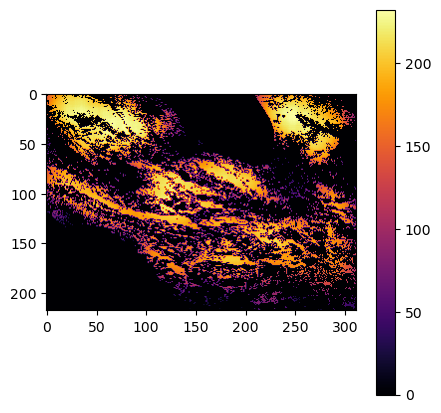

<Figure size 500x500 with 0 Axes>

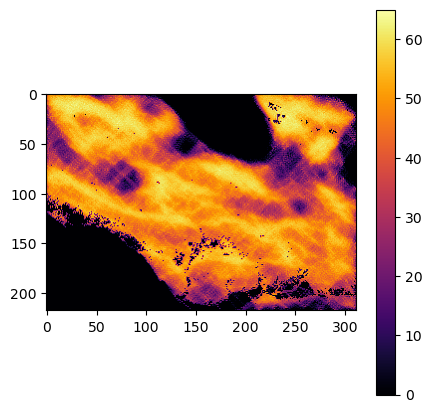

In [37]:
conn = GeoTiff.from_file(CONNECTIVITY_PATH)
conn.draw_geotiff()
flow = GeoTiff.from_file(FLOW_PATH)
flow.draw_geotiff()

sensitivity:


<Figure size 500x500 with 0 Axes>

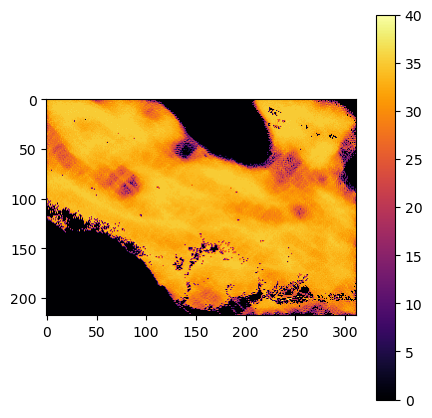

In [39]:
from scgt import Tile, GeoTiff

optimizer = restorationOptimizer(HABITAT_PATH, TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, PERMEABILITY_PATH, 10)


sensitivity_tif = optimizer.get_sensitivity_of_grad("sensitivity.tif")
raw_sensitivity = sensitivity_tif.get_all_as_tile().m

print("sensitivity:")
sensitivity_tif.draw_geotiff()


death:


<Figure size 500x500 with 0 Axes>

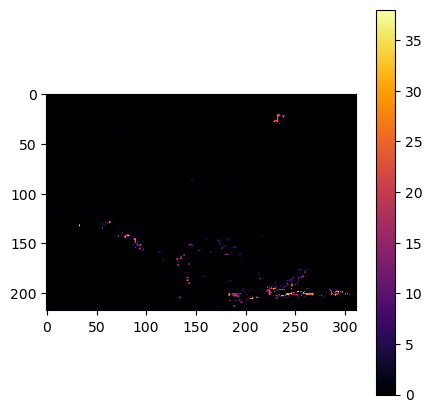

In [40]:
death_tif = optimizer.get_death_layer("death.tif")
print("death:")
death_tif.draw_geotiff()